In [1]:
# -*- coding: utf-8 -*-
"""自己紹介ユーザーのコメント数集計.ipynb

Automatically generated by Colaboratory.

Original file is located at
    https://colab.research.google.com/drive/1NgV87lKvqceBjfP9eFuAE_b9hrPO504N
"""

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
from matplotlib import rcParams
sns.set(font="IPAexGothic", style="whitegrid")

# 自己紹介してからの日時
count = pd.read_csv("input/selfintro_except_murakami.csv")

count


,Unnamed: 0,index,talk_user,comments,Percentage[%],Cumulative sum[%],自己紹介,自己紹介してからの日数
0,0,1,増田貴志,304,9.313725,9.313725,あり,118.0
1,1,2,はやと-休学中の文系学生,280,8.578431,17.892157,あり,130.0
2,2,3,sota_sakuma,235,7.199755,25.091912,あり,129.0
3,3,4,Kotaro Fukushima,189,5.790441,30.882353,あり,98.0
4,4,5,banquet.kuma,188,5.759804,36.642157,あり,59.0
...,...,...,...,...,...,...,...,...
76,76,77,Slackbot,1,0.030637,99.264706,あり,55.0
77,77,78,倉津 聡男,1,0.030637,99.295343,あり,75.0
78,78,79,あんどう,1,0.030637,99.325980,なし,NaN
79,79,80,kazuma_kawaguchi,1,0.030637,99.356618,あり,14.0


/Users/naokikomiya/dev_komiya/dlg_slack_competition/自己紹介ユーザーのコメント数集計.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/naokikomiya/dev_komiya/dlg_slack_competition/自己紹介ユーザーのコメント数集計.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


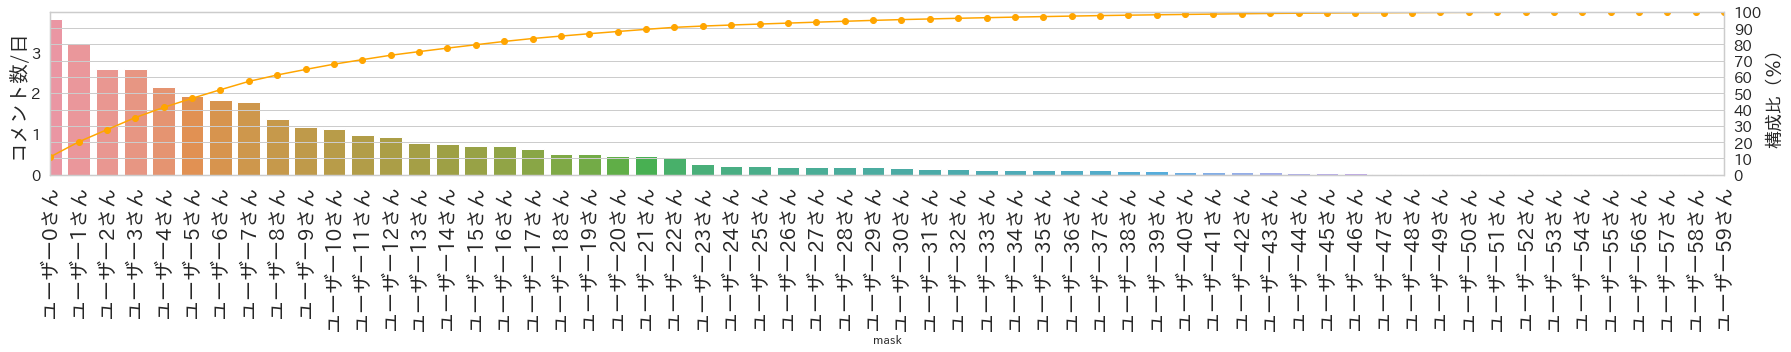

In [2]:
# 自己紹介ありのユーザーだけに絞る
count_only_intro = count[count["自己紹介"] == "あり"]

# 一日あたりのコメント数の欄を作る
count_only_intro["1日あたりのコメント数"] = count_only_intro["comments"] / \
    count_only_intro["自己紹介してからの日数"]

# 一日あたりのコメント数を基準に構成比を出す
count_only_intro["1日あたりのコメント数構成比[%]"] = (
    count_only_intro["1日あたりのコメント数"]/sum(count_only_intro["1日あたりのコメント数"]))*100

count_only_intro

# "1日あたりのコメント数構成比[%]"でソートする
count_only_intro = count_only_intro.sort_values(
    by="1日あたりのコメント数構成比[%]", ascending=False)

# "1日あたりのコメント数構成比[%]の累積相対度数を出す
count_only_intro["累積相対度数[%]"] = count_only_intro["1日あたりのコメント数構成比[%]"].cumsum()

# indexを振り直す
count_only_intro = count_only_intro.reset_index()

count_only_intro['mask'] = [f'ユーザー{i}さん' for i in range(
    len(count_only_intro['talk_user']))]

# count_only_intさん
count_only_intro['mask']

# 村上さん除いたパレート図（自己紹介ありのみ）
ax1 = sns.barplot(
    x=count_only_intro["mask"], y="1日あたりのコメント数", data=count_only_intro)
ax2 = ax1.twinx()

count_only_intro["累積相対度数[%]"].plot(
    figsize=(30, 3), color='orange', ax=ax2, marker='o')
xlabels = ax1.get_xticklabels()
ax1.set_xticklabels(xlabels, rotation='vertical', fontsize=20)
ax1.set_ylabel("コメント数/日", fontsize=20)
ax2.set_ylabel("構成比（％）", fontsize=18)
ax2.set_ylim([0, 100])
ax1.tick_params(axis="y", labelsize=15, color="white")
ax2.tick_params(axis="y", labelsize=15, color="white")

# ax1の目盛り線を消した
ax1.grid(which="major", axis="y", color="blue", alpha=0.8,
         linestyle="", linewidth=1)

ax2.set_yticks(list(range(0, 110, 10)))

count_only_intro.to_csv("1日あたりのコメント数.csv")

